<a href="https://colab.research.google.com/github/nishi1612/CS306-Data-Analysis-and-Visualization/blob/master/201601408_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1cdGFghBnmVSV1xF85kZ90Y5cRQN7pWmq'})
download.GetContentFile('test.csv')

In [0]:
df = pd.read_csv('test.csv')

In [0]:
copy_one = df

In [0]:
f = df

In [0]:
to_drop = ["Year", "Month", "DayofMonth", "DayOfWeek", 
           "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "UniqueCarrier", 
           "FlightNum", "TailNum", "ActualElapsedTime", "CRSElapsedTime","ArrDelay", "DepDelay", "Origin", "Dest",
           "TaxiIn", "TaxiOut", "Cancelled", "CancellationCode", "Diverted", 
           "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", 
           "LateAircraftDelay"]

f.drop(to_drop, inplace=True, axis=1)

In [0]:
f = f[np.isfinite(f['AirTime'])]
f = f[np.isfinite(f['Distance'])]

In [0]:
def plot_scatter(f,g):
    x = f[g].values
    if(x.size == np.arange(0,len(x)).size):
        plt.scatter(np.arange(0,len(x)),x)
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.title('Values of ' + str(g))
        plt.show()

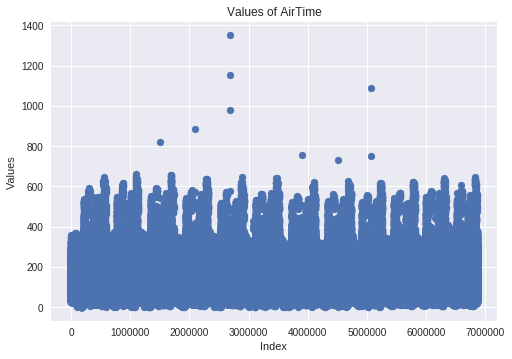

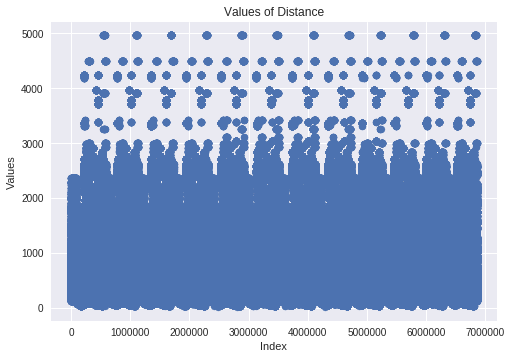

In [0]:
plot_scatter(f,'AirTime')
plot_scatter(f,'Distance')

In [0]:
def plot_box_plot(f,g):
    sns.boxplot(x=f[g])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


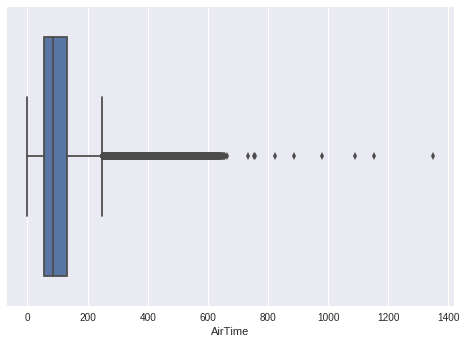

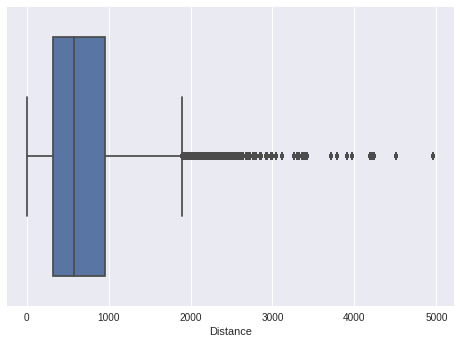

In [0]:
sns.boxplot(x=f['AirTime'])
plt.show()
sns.boxplot(x=f['Distance'])
plt.show()

In [0]:
Q1 = f.quantile(0.25)
Q3 = f.quantile(0.75)
IQR = Q3 - Q1
f = f[~((f < (Q1 - 1.5 * IQR)) |(f > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


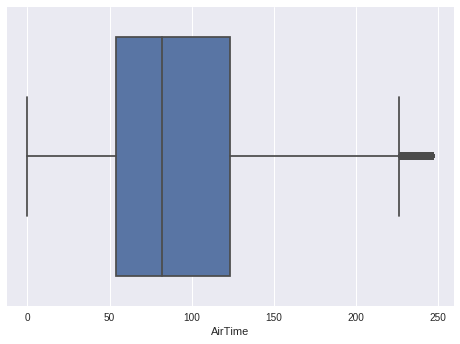

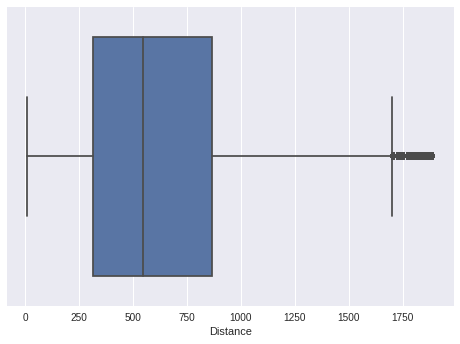

In [0]:
sns.boxplot(x=f['AirTime'])
plt.show()
sns.boxplot(x=f['Distance'])
plt.show()

In [0]:
def plot_pdf(f,g):
    maxi = f[g].max()
    k = f[g].groupby(pd.cut(f[g], np.arange(0, (maxi - maxi%10 + 10), 10))).count()
    print(type(k))
    k = k.to_frame()
    x = k.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    k_copy = pd.DataFrame(x_scaled)
    plt.plot(np.arange(0, (maxi - maxi%10), 10),k_copy)
    plt.xlabel('Data')
    plt.ylabel('Probability')
    plt.title('PDF of ' + g)
    plt.show()
    return k_copy

<class 'pandas.core.series.Series'>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


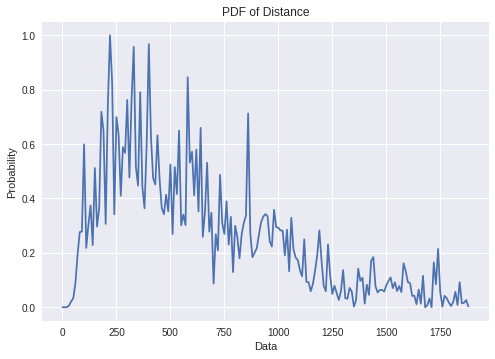

<class 'pandas.core.series.Series'>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


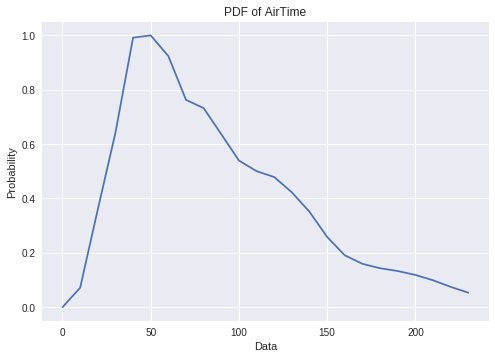

In [0]:
pdf1 = plot_pdf(f,'Distance')
pdf2 = plot_pdf(f,'AirTime')

In [0]:
def plot_cdf(f,g):
    maxi = f[g].max()
    k = f[g].groupby(pd.cut(f[g], np.arange(0, (maxi - maxi%10 + 10), 10))).count()
    k = k.cumsum()
    k = k.to_frame()
    x = k.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    k_copy = pd.DataFrame(x_scaled)
    plt.plot(np.arange(0, (maxi - maxi%10), 10),k_copy)
    plt.xlabel('Data')
    plt.ylabel('Probability')
    plt.title('CDF of ' + g)
    plt.show()
    return k_copy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


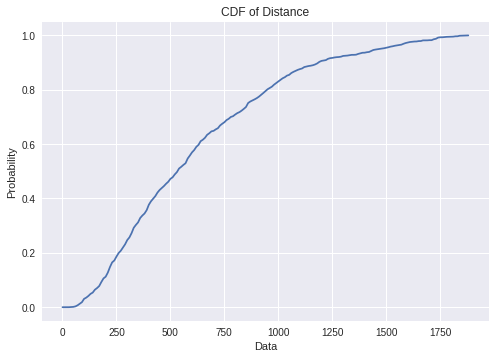

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


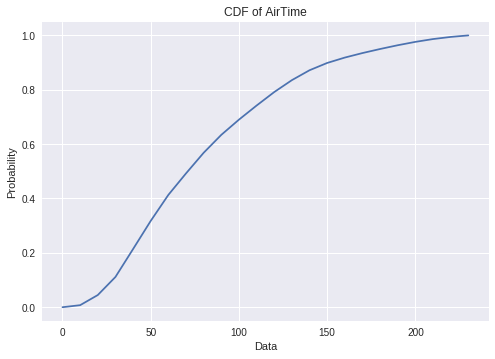

In [0]:
cdf1 = plot_cdf(f,'Distance')
cdf2 = plot_cdf(f,'AirTime')

In [0]:
norm = cdf1[cdf1.columns[0]].values
dist = cdf2[cdf2.columns[0]].values
D = 0
ind = 0
for i in range(0,len(dist)):
  if (D < abs(norm[i]-dist[i])):
    D = abs(norm[i]-dist[i])
    ind = i

norm[ind]=ind
dist[ind]=ind

a = 0.5
RHS = np.sqrt((norm[ind]+dist[ind])/(norm[ind]*dist[ind]))
RHS = RHS*np.sqrt(-1*np.log(a))

print(D, RHS)

0.8591543134083125 0.2569319310560392
